In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import scipy
import sklearn.neighbors
import umap
import seaborn as sns
import hdbscan
import os
#import networkx

In [2]:
colors4 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D']
colors6 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449']
colors7 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8']
colors8 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64']
colors9 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701']
colors10 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE']
colors11 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337']
colors12 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337']
colors13 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1']
colors14 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']
colors15 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors16 = ['#808000', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors17 = ['#7DDCAC', '#808000', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors18 = ['#ED1D0C','#808000', '#FA8072', '#7DDCAC', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']

# 8 different color palettes with different amount of colors in it
colors = [colors6, colors7, colors8, colors9, colors10, colors11, colors12, colors13, colors14, colors15, colors16, colors17, colors18]
#sns.set_palette(sns.color_palette(colors18))


# new colors from color brewer (12):
colors_new = ['#8dd3c7', '#BD11A1', '#bebada', '#097E02','#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#b15928', '#6a3d9a', '#38E1F5','#1f78b4','#ff7f00', '#484848', '#ffed6f']
colors_mettalic = ['#4682bf', '#eda6c4', '#aa4069', '#ffe898','#838996', '#c3def3','#cd9575', '#c9ffe5', '#5fa777', '#001440', '#722f37', '#e18e96', '#8e88ce', '#ec5297', '#1b4d3e', '#da680f', '#3399ff', '#d9b611']
sns.set_palette(sns.color_palette(colors_new))

In [3]:
roi_labels = np.load('/Users/jenniferthem/Masterthesis_Data/roi_labels.npy', allow_pickle=True)
roi_labels_df = pd.DataFrame(roi_labels)
# load the Correlation matrices
baseline_mat = np.load('/Users/jenniferthem/Masterthesis_Data/corr_dist_df_baseline.npy')
ket_mat = np.load('/Users/jenniferthem/Masterthesis_Data/Ketamine_corr_dist.npy')
placebo_mat = np.load('/Users/jenniferthem/Masterthesis_Data/Placebo_corr_dist.npy')

In [ ]:
# load pickle umap_p and umap_p2
#/Users/jenniferthem/Masterthesis_Data/UMAP_Placebo_2.npy -->umap_p2
#/Users/jenniferthem/Masterthesis_Data/UMAP_Placebo_3.npy --> umap_p

## Functions

In [4]:
import random

5809 is the random initialization for random_state in UMAP algorithm

In [6]:
random_num = random.randint(0, 11883)
print(random_num)

5809


In [8]:
# data, neighbors: how many next neighbors: int, name: how to call the resulting file: String, sav_path: output directory: string, roi_labels_df: DataFrame
def analysis_embedding_clustering(data, neighbors, metric, name, sav_path, cluster_selection_method, roi_labels_df):
    
    # UMAP embedding
    embedding = umap.UMAP(
        n_neighbors=neighbors,
        n_components=2,
        min_dist=0.0, # best for clustering
        metric=metric,
        random_state=random_num
    ).fit_transform(data)
    
    # save umap results as dataframe
    embedding_df = pd.DataFrame(embedding)
    # set name for saving
    name_umap = 'UMAP_' + name
    # save umap result
    np.save(os.path.join(sav_path, name_umap), embedding)

    # plot the embedding 
    %matplotlib notebook
    plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1, cmap='Spectral');
    plt.title('UMAP Projection', fontsize=18);
    # save plot
    plt.savefig(os.path.join(sav_path, 'Plots', name_umap))
    
    
    # HDBScan
    labels = hdbscan.HDBSCAN(
        min_samples=5,
        min_cluster_size=50,
        cluster_selection_method=cluster_selection_method
    ).fit_predict(embedding)
    
    
    clusterer_hdb = hdbscan.HDBSCAN(
        min_samples=5,
        min_cluster_size=50,
        gen_min_span_tree=True,
        cluster_selection_method=cluster_selection_method
    ).fit(embedding)
    
    
    num_labels = np.amax(labels)+1
    
        
    clustered = (labels >= 0)
    
    labels_df = pd.DataFrame(labels)
    
    # concatenation of umap results and roi labels
    UMAP_roi_df = pd.concat([embedding_df, roi_labels_df], axis=1)
    # renaming
    UMAP_roi_df.columns = ['x', 'y', 'ROI']
    # saving dataframe
    name_sav_umap_roi = 'UMAP_ROI_' + name
    UMAP_roi_df.to_pickle(os.path.join(sav_path, name_sav_umap_roi))
    
    # concatenation of umap results and hdbscan labels
    UMAP_hdbscan_labels_df = pd.concat([embedding_df, labels_df], axis =1)
    # renaming 
    UMAP_hdbscan_labels_df.columns = ['x', 'y', 'class']
    # saving dataframe
    name_sav_umap_hdbscan = 'UMAP_HDBScan_' + name
    UMAP_roi_df.to_pickle(os.path.join(sav_path, name_sav_umap_hdbscan))
    
    # UMAP results with HDBScan label & ROI label
    UMAP_hdbscan_roi = pd.concat([UMAP_hdbscan_labels_df, roi_labels_df], axis=1)
    UMAP_hdbscan_roi.columns = ['x', 'y', 'HDBScanLabel', 'ROI']
    name_sav_all = 'UMAP_HDBScan_ROI_' + name
    UMAP_hdbscan_roi.to_pickle(os.path.join(sav_path, name_sav_all))
    
    percent_clustered = (np.sum(clustered) / embedding.shape[0])*100
    print(percent_clustered, '% of the data points were clustered')
    print('The HDBScan clustering yielded ', num_labels, ' classes')
    
    return embedding,num_labels, UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, UMAP_hdbscan_roi, clusterer_hdb


In [9]:
# data has to have form of x, y, class DataFrame, clustered: np array
def plotting_hdbscan(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, color_palette, sav_path, name):
    
    %matplotlib notebook
    plot = sns.scatterplot(x="x", y="y", hue='class', data=UMAP_hdbscan_labels_df[clustered], palette = color_palette, legend = 'full', s=10)
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    hdbscan_plot = 'hdbscan_plot_' +  name
    plt.savefig(os.path.join(sav_path, 'Plots', hdbscan_plot))
    

In [10]:
def plotting_rois(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, color_palette, sav_path, name):
    %matplotlib notebook
    sp = sns.scatterplot(x="x", y="y", hue='ROI', data=UMAP_roi_df[clustered], palette = color_palette, legend = 'full', s=10)
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    roi_plot = 'hdbscan_roi_plot_' +  name
    plt.savefig(os.path.join(sav_path, 'Plots', roi_plot))

In [11]:
# input: df containing x & y from UMAP, HDBScanlabel & ROI label, n_class: number of classes from hdbscan, keys: list of ROIs
# keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 's32', 'FP2', '25', 's24', '33', 'p32', 'p24ab', 'p24c', 'Putamen', 'NAcc', 'Caudate']
# name_hhdbscan: 'HDBScanLabel' - String
keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 's32', 'FP2', '25', 's24', '33', 'p32', 'p24ab', 'p24c', 'Putamen', 'NAcc', 'Caudate']

def create_cluster_roi_df(clu_roi_df, n_class, keys, name_hdbscan, path):
    count = 0
    clu_list = []
    # while loop to create a list of clusters
    while count < np.amax(n_class):
        # list of clusters
        # 'HDBSCanLabel can be replaced with name_hdbscan'
        
        clu_list.append(clu_roi_df.loc[clu_roi_df['HDBScanLabel']==count])
        count = count+1
        
    
    clu_list
    # initializing dic
    clu_roi_dic = {}    
    count_clu = 0
    
    # loop through all clusters
    while(count_clu < np.amax(n_class)):
        # name of the cluster
        str_count = 'Cluster_' + str(count_clu)
        # initializing nested dic
        clu_roi_dic[str_count] = {}
        # index for the list of clusters
        clu_it = 0
        for entry in keys:
            clu = clu_list[count_clu]    
            # filling nested dictionary
            clu_roi_dic[str_count][entry] = (clu.ROI.values == entry).sum()
            
            
        count_clu = count_clu+1
        
        clu_roi_df = pd.DataFrame.from_dict(clu_roi_dic, orient='index')
        
        
        clu_roi_df.to_pickle(os.path.join(path, 'cluster_roi_df'))

    return clu_roi_df


# Tests

### Baseline

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


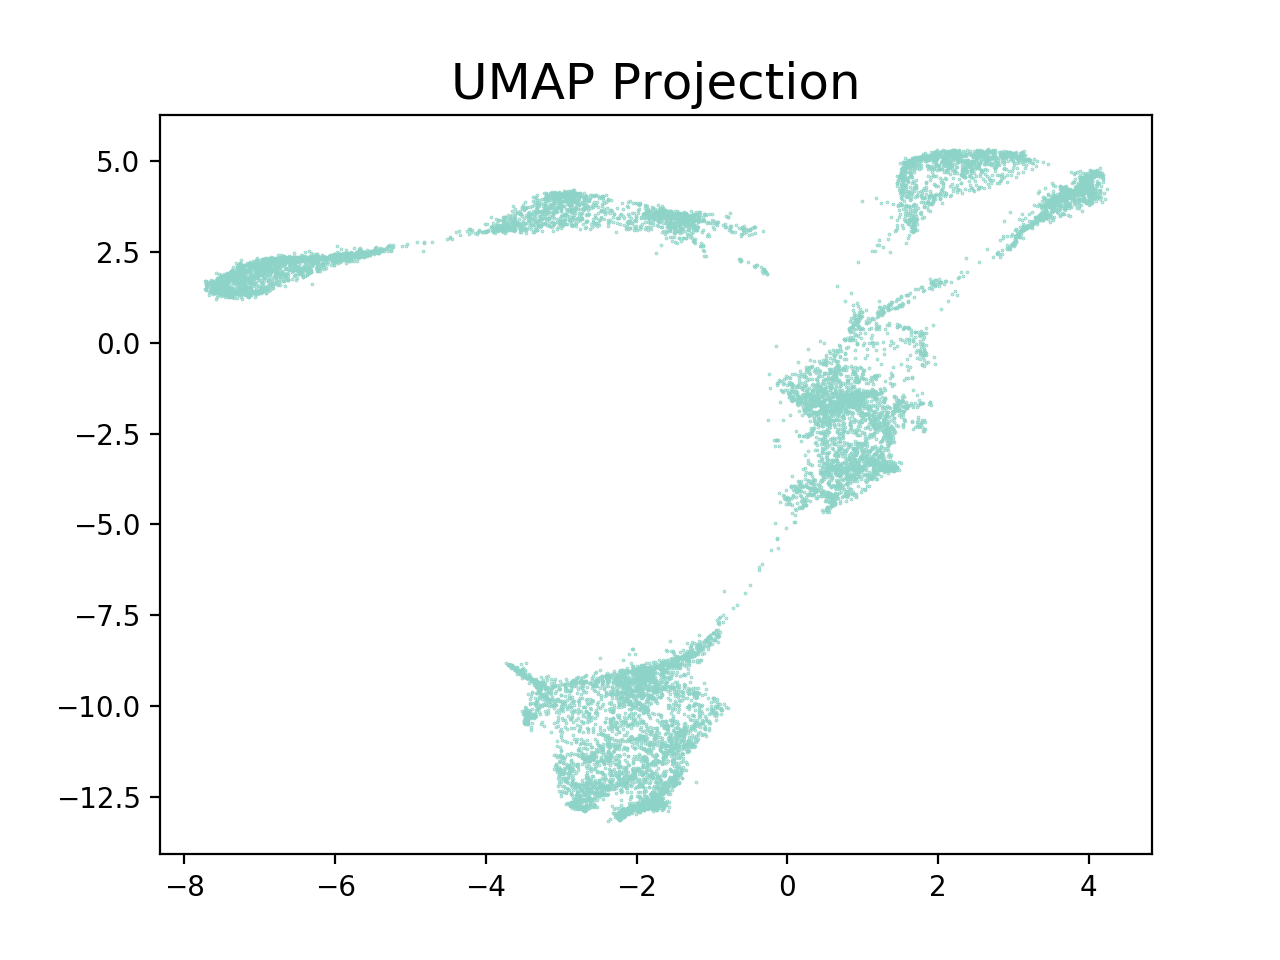

95.19481612387443 % of the data points were clustered
The HDBScan clustering yielded  11  classes


In [14]:
[embedding_b, num_labels_b, UMAP_hdbscan_labels_df_b, UMAP_roi_df_b, clustered_b, UMAP_hdbscan_roi_b, clusterer_b] = analysis_embedding_clustering(baseline_mat, 80, 'precomputed', 'Baseline', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

<IPython.core.display.Javascript object>


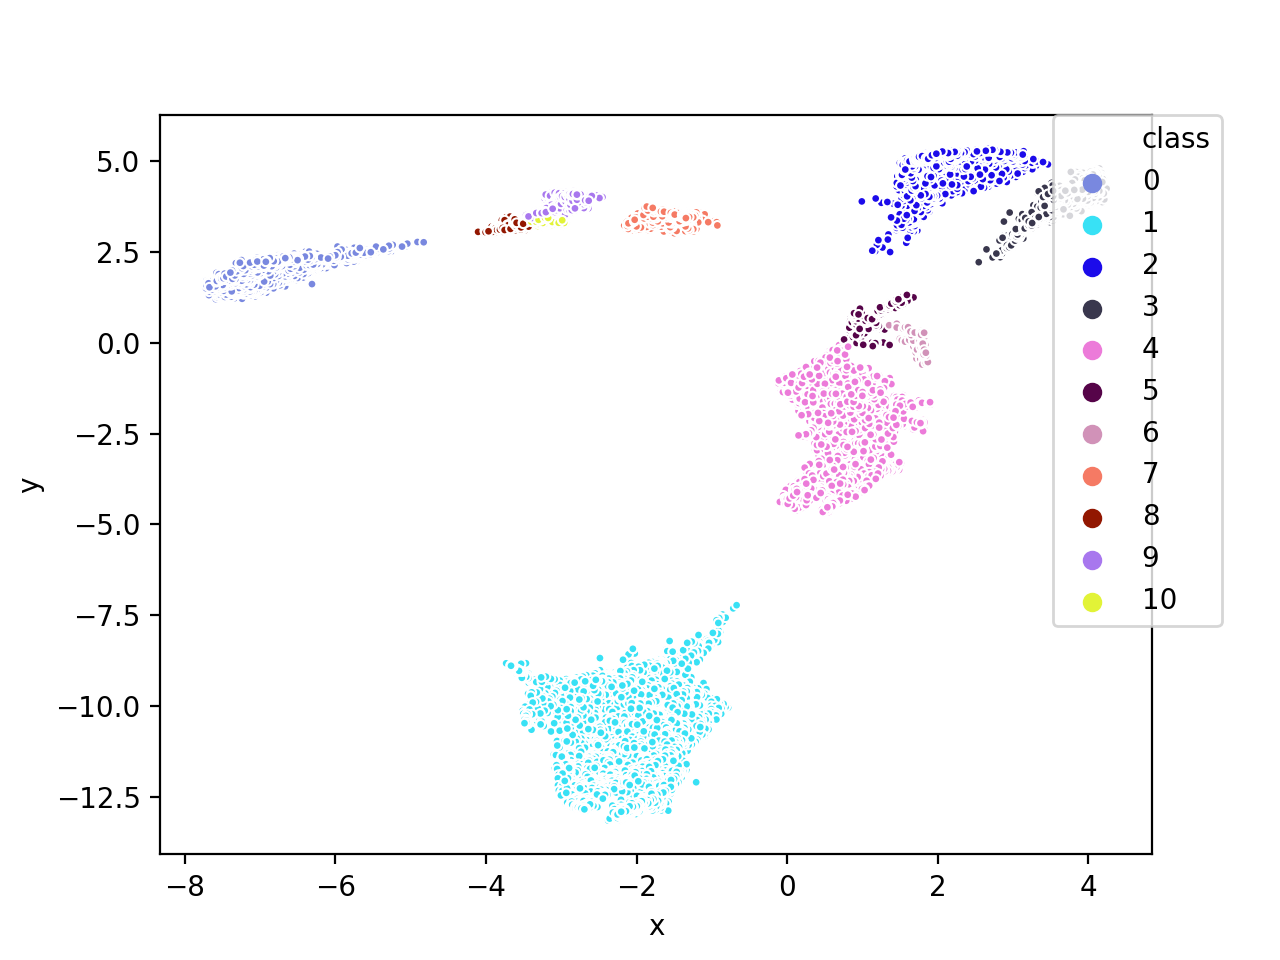

In [16]:
plotting_hdbscan(UMAP_hdbscan_labels_df_b, UMAP_roi_df_b, clustered_b, colors11, '/Users/jenniferthem/Masterthesis_Data', 'Baseline')

<IPython.core.display.Javascript object>


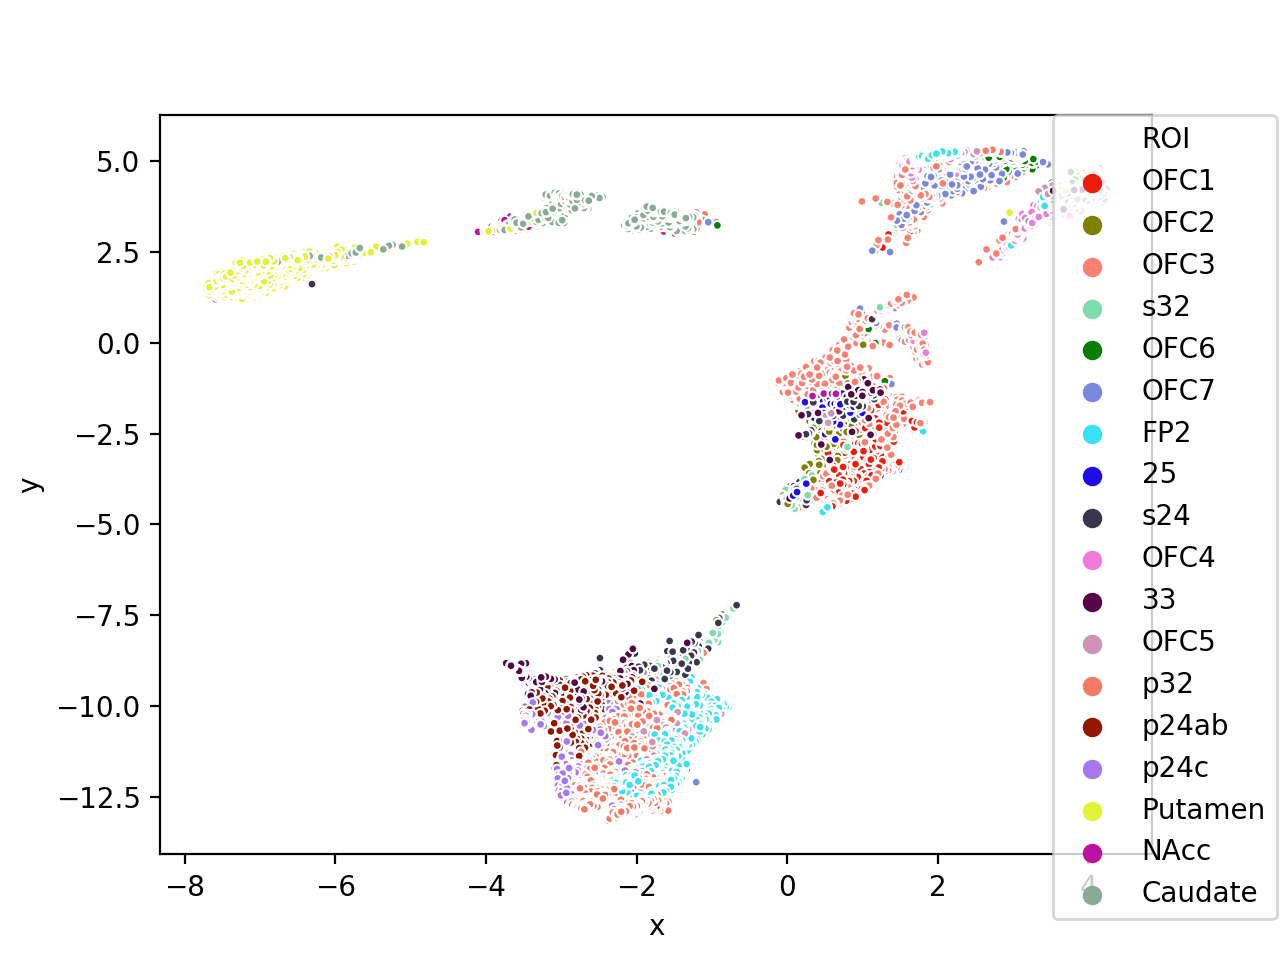

In [17]:
plotting_rois(UMAP_hdbscan_labels_df_b, UMAP_roi_df_b, clustered_b, colors18, '/Users/jenniferthem/Masterthesis_Data', 'Baseline')

In [18]:
clu_roi_dic = create_cluster_roi_df(UMAP_hdbscan_roi_b, 11, keys, 'HDBScanLabel', '/Users/jenniferthem/Masterthesis_Data')
display(clu_roi_dic)

,OFC1,OFC2,OFC3,OFC4,OFC5,OFC6,OFC7,s32,FP2,25,s24,33,p32,p24ab,p24c,Putamen,NAcc,Caudate
Cluster_0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1585,11,38
Cluster_1,3,7,52,31,55,23,24,248,721,0,200,269,1349,419,460,0,0,0
Cluster_2,15,0,235,201,148,256,193,11,64,0,0,0,32,0,0,0,0,0
Cluster_3,0,0,43,203,135,261,128,1,16,0,0,6,17,0,1,2,0,0
Cluster_4,669,653,806,0,3,1,1,39,25,128,97,65,2,0,0,0,4,0
Cluster_5,0,2,140,0,0,3,7,12,0,0,1,0,0,0,0,0,0,0
Cluster_6,0,0,59,6,0,6,8,0,0,0,0,0,0,0,0,0,0,0
Cluster_7,3,0,30,0,0,1,8,18,0,0,1,25,41,0,10,4,9,356
Cluster_8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,30,109,22
Cluster_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,1,361


### Ketamine

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


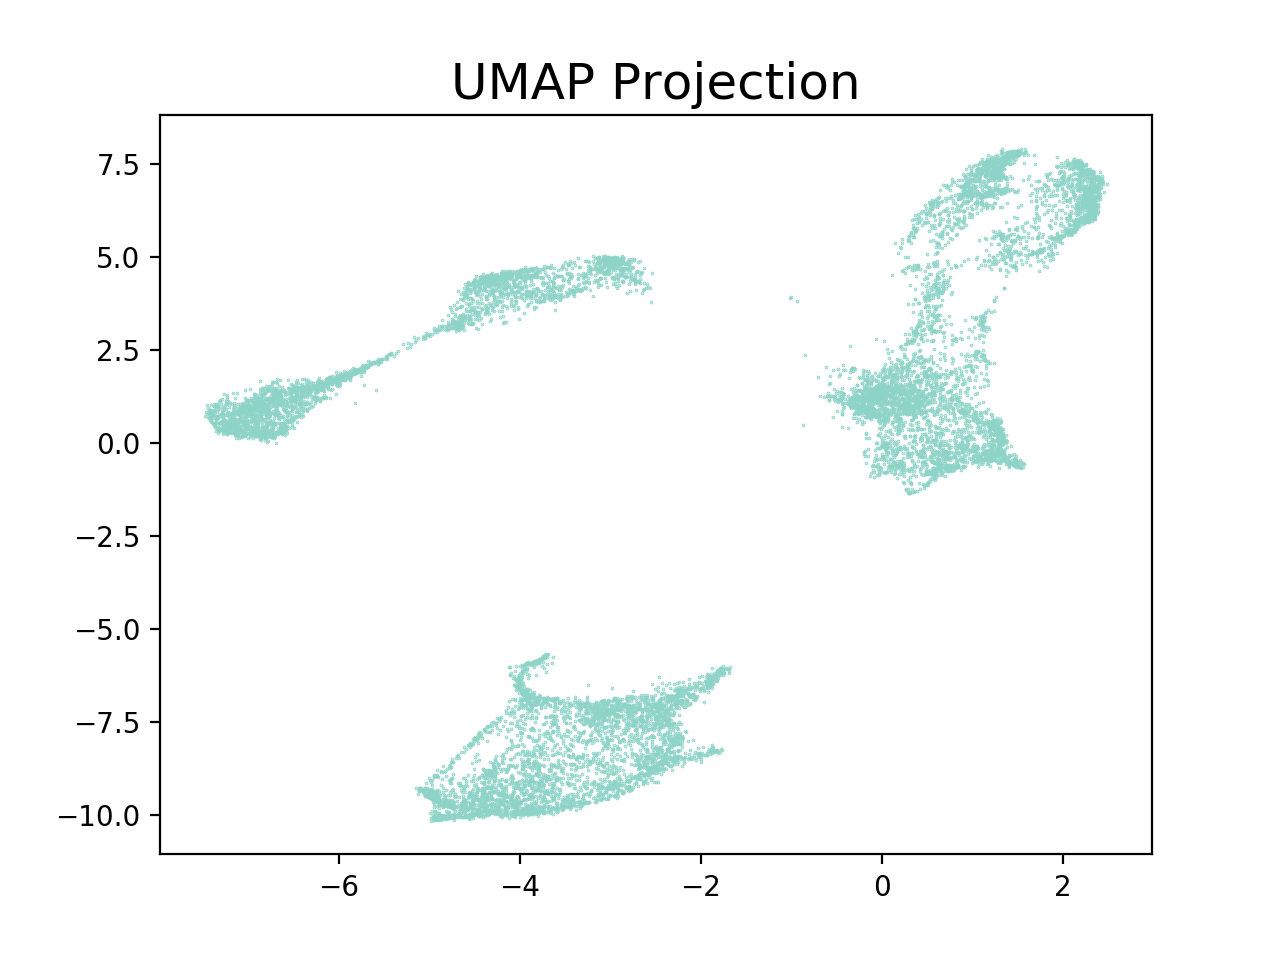

96.41504670537742 % of the data points were clustered
The HDBScan clustering yielded  10  classes


In [20]:
[embedding_k, num_labels_k, UMAP_hdbscan_labels_df_k, UMAP_roi_df_k, clustered_k, UMAP_hdbscan_roi_k, clusterer_k] = analysis_embedding_clustering(ket_mat, 80, 'precomputed', 'Ketamine', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

<IPython.core.display.Javascript object>


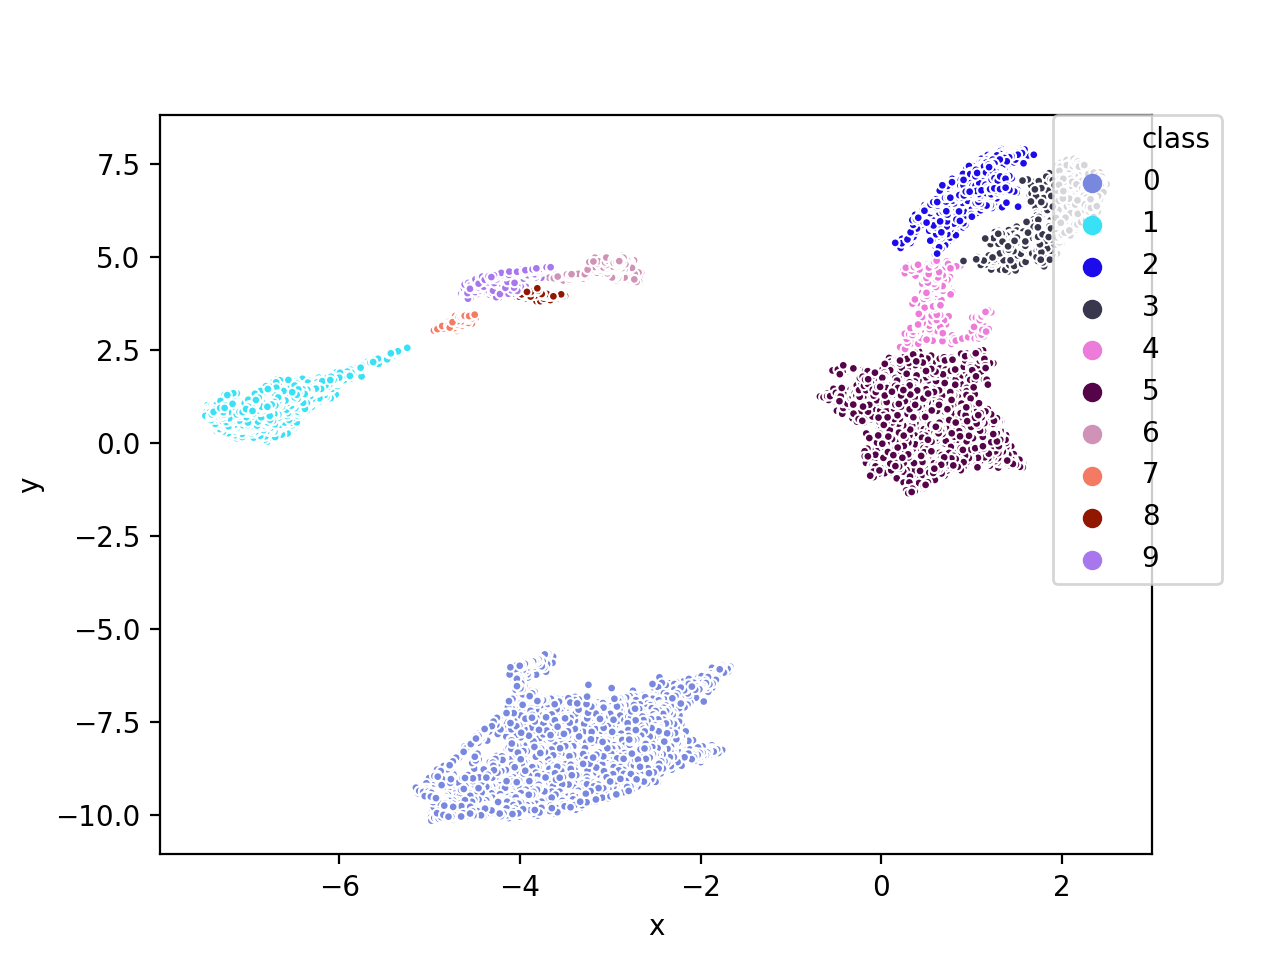

In [21]:
plotting_hdbscan(UMAP_hdbscan_labels_df_k, UMAP_roi_df_k, clustered_k, colors10, '/Users/jenniferthem/Masterthesis_Data', 'Ketamine')

<IPython.core.display.Javascript object>


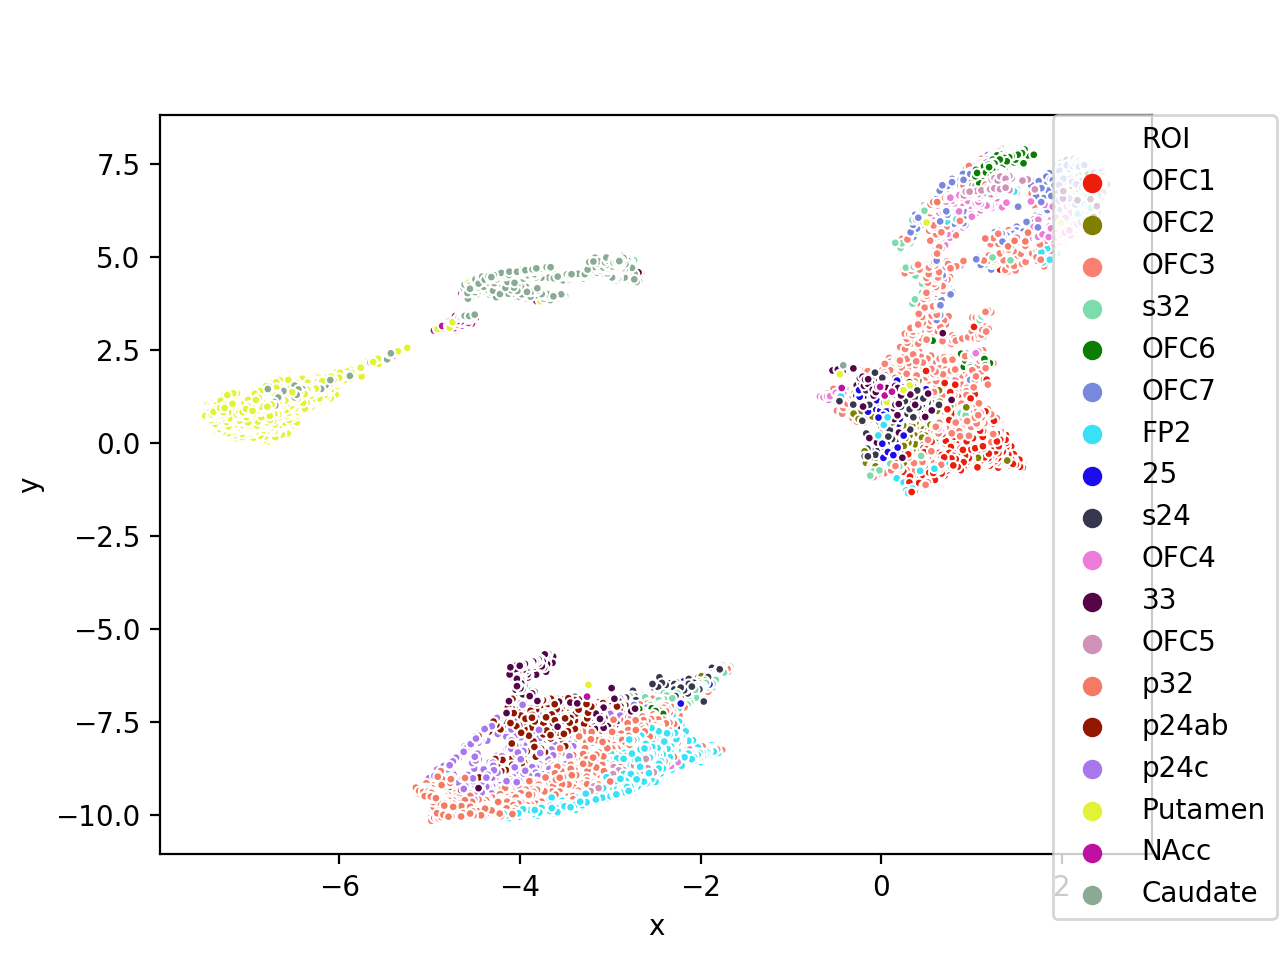

In [22]:
plotting_rois(UMAP_hdbscan_labels_df_k, UMAP_roi_df_k, clustered_k, colors18, '/Users/jenniferthem/Masterthesis_Data', 'Ketamine')

In [23]:
clu_roi_dic = create_cluster_roi_df(UMAP_hdbscan_roi_k, 10, keys, 'HDBScanLabel', '/Users/jenniferthem/Masterthesis_Data')
display(clu_roi_dic)

,OFC1,OFC2,OFC3,OFC4,OFC5,OFC6,OFC7,s32,FP2,25,s24,33,p32,p24ab,p24c,Putamen,NAcc,Caudate
Cluster_0,8,6,66,30,58,22,23,250,727,4,194,314,1368,419,459,1,1,0
Cluster_1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1582,14,34
Cluster_2,0,0,77,186,133,262,152,10,7,0,0,0,17,0,3,1,0,0
Cluster_3,3,1,153,204,150,255,186,12,63,0,0,6,33,0,0,1,0,0
Cluster_4,4,0,249,5,0,3,24,22,0,0,0,2,0,0,0,0,0,0
Cluster_5,671,664,882,20,0,12,4,47,27,124,107,83,0,0,0,4,4,1
Cluster_6,0,0,6,0,0,0,1,2,0,0,1,10,22,0,9,2,3,326
Cluster_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,78,9
Cluster_8,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2,7,60
Cluster_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,8,411


### Placebo

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


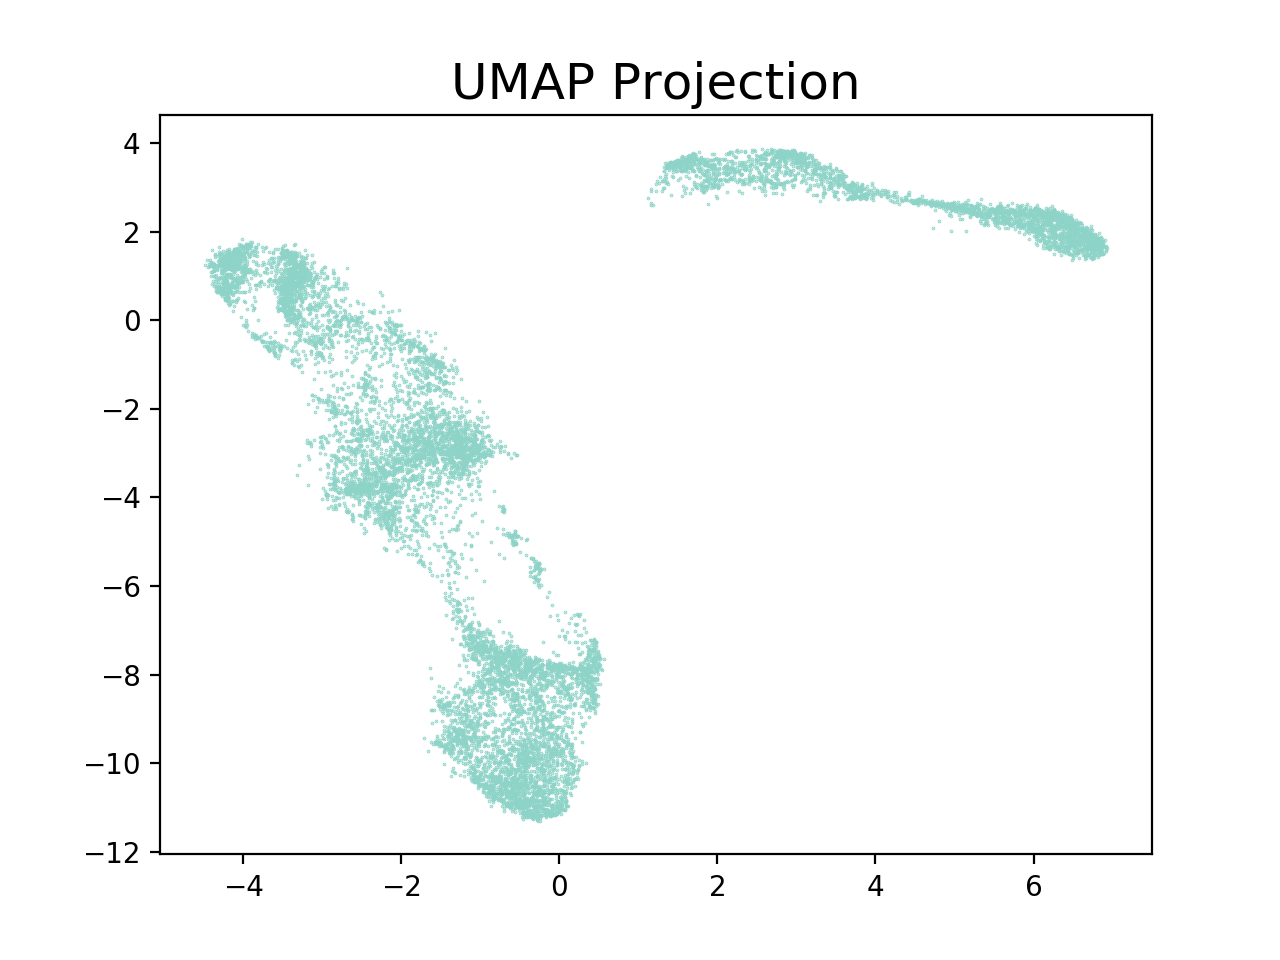

95.64083143987209 % of the data points were clustered
The HDBScan clustering yielded  10  classes


In [24]:
[embedding_p, num_labels_p, UMAP_hdbscan_labels_df_p, UMAP_roi_df_p, clustered_p, UMAP_hdbscan_roi_p, clusterer_p] = analysis_embedding_clustering(placebo_mat, 80, 'precomputed', 'Placebo', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

<IPython.core.display.Javascript object>


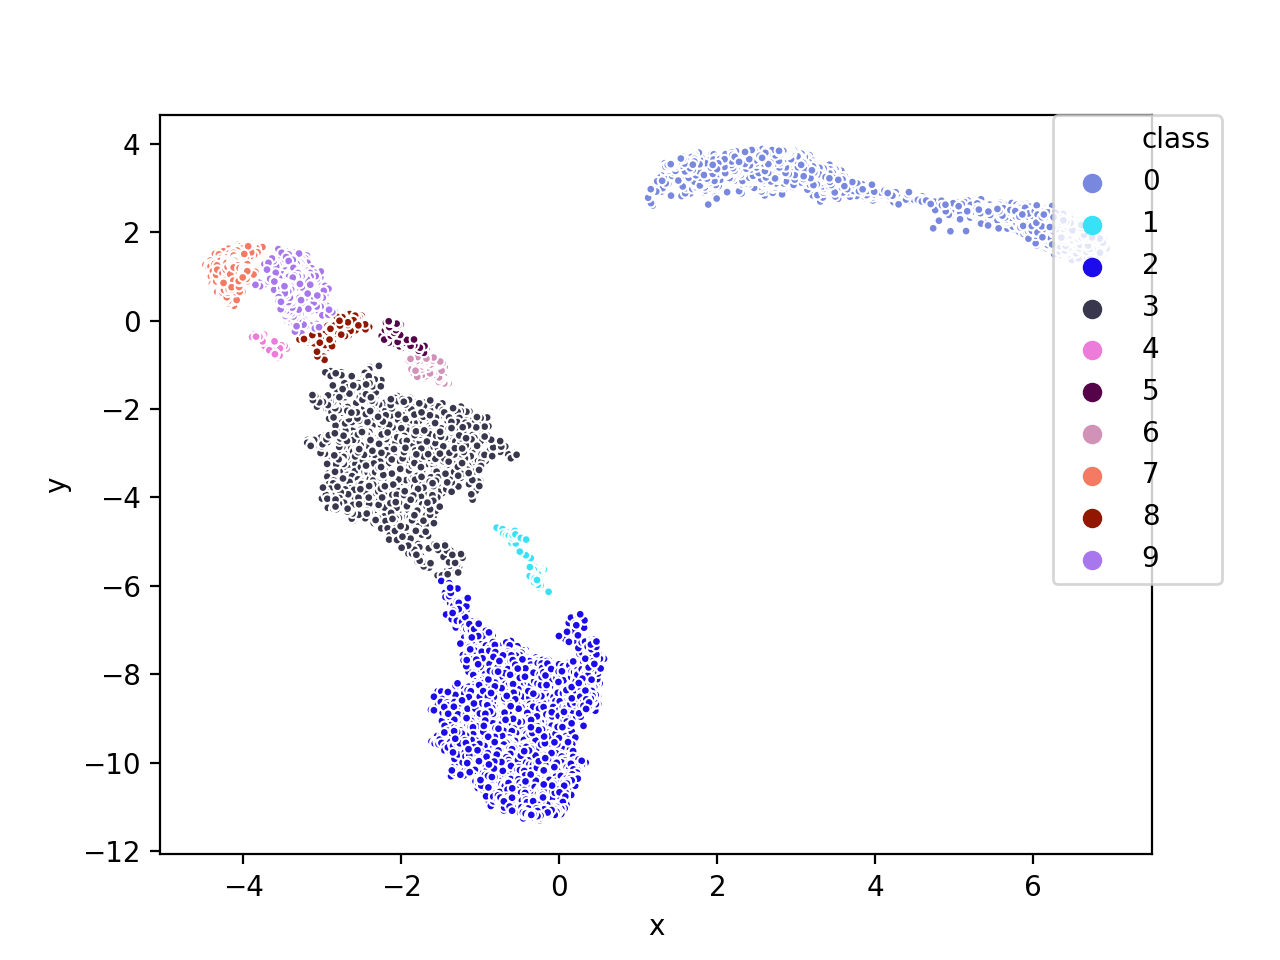

In [25]:
plotting_hdbscan(UMAP_hdbscan_labels_df_p, UMAP_roi_df_p, clustered_p, colors10, '/Users/jenniferthem/Masterthesis_Data', 'Placebo')

<IPython.core.display.Javascript object>


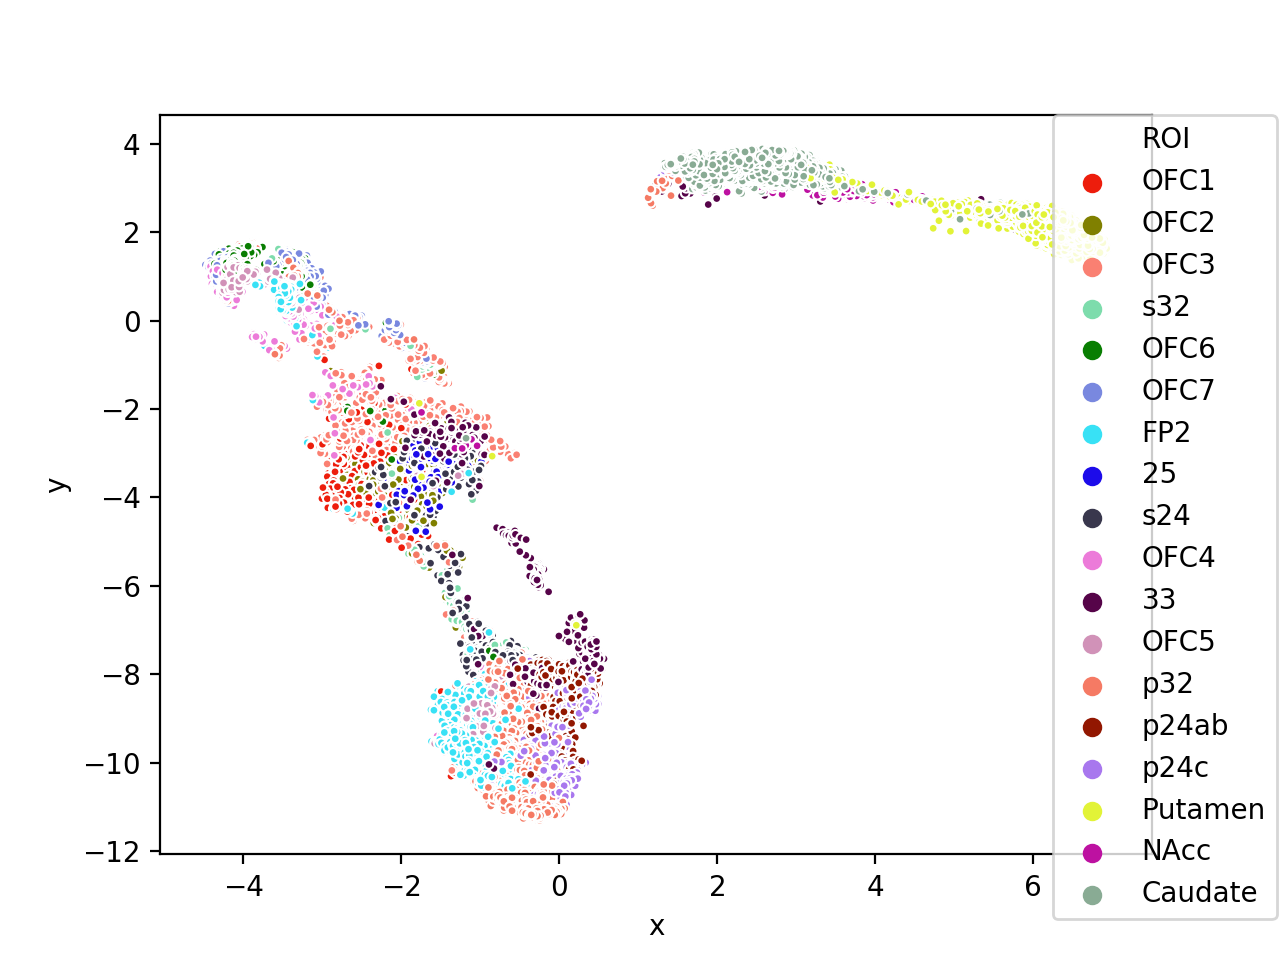

In [26]:
plotting_rois(UMAP_hdbscan_labels_df_p, UMAP_roi_df_p, clustered_p, colors18, '/Users/jenniferthem/Masterthesis_Data', 'Placebo')


In [27]:
clu_roi_dic = create_cluster_roi_df(UMAP_hdbscan_roi_p, 10, keys, 'HDBScanLabel', '/Users/jenniferthem/Masterthesis_Data')
display(clu_roi_dic)

,OFC1,OFC2,OFC3,OFC4,OFC5,OFC6,OFC7,s32,FP2,25,s24,33,p32,p24ab,p24c,Putamen,NAcc,Caudate
Cluster_0,0,0,2,0,0,0,1,1,0,0,2,34,17,0,8,1662,185,1056
Cluster_1,0,0,0,0,0,0,0,0,0,0,0,91,0,0,0,0,0,0
Cluster_2,9,4,68,30,52,22,23,257,725,0,163,215,1363,416,459,3,0,0
Cluster_3,658,656,867,23,4,13,1,38,11,122,110,82,9,0,0,3,6,1
Cluster_4,0,0,10,48,0,0,0,0,6,0,0,0,3,0,0,0,0,0
Cluster_5,0,0,45,0,0,1,29,22,0,0,0,0,1,0,0,0,0,0
Cluster_6,1,3,120,0,0,2,13,9,0,0,0,0,0,0,0,0,0,0
Cluster_7,0,0,19,106,118,242,102,0,1,0,0,0,14,0,1,0,0,0
Cluster_8,3,1,113,18,0,0,13,4,6,0,0,0,1,0,0,0,0,0
Cluster_9,0,0,26,162,155,251,130,3,60,0,0,0,31,0,0,0,0,0


Save embeddings as numpy files

In [28]:
np.save('/Users/jenniferthem/Masterthesis_Data/2020-01-results-B-P-K/Umap_placebo', embedding_p)
np.save('/Users/jenniferthem/Masterthesis_Data/2020-01-results-B-P-K/Umap_ketamine', embedding_k)
np.save('/Users/jenniferthem/Masterthesis_Data/2020-01-results-B-P-K/Umap_baseline', embedding_b)